# Extracting the zipfile

In [4]:
from zipfile import ZipFile

with ZipFile('viz-data-plaksha-final-s2021.zip','r') as file:
    file.extractall()

# Reading the files and converting them into usable format

In [19]:
import pandas as pd
import warnings

# Turning of the warnings
warnings.filterwarnings('ignore')

# Reading the files
google=pd.read_csv('viz-data-plaksha-final-s2021/google.txt',sep='\t')
ny=pd.read_csv('viz-data-plaksha-final-s2021/ny.txt',sep='\t')
yahoo=pd.read_csv('viz-data-plaksha-final-s2021/yahoo.txt',sep='\t')

In [20]:
google.head(2)

,Modified Julian Date,Stock Value
0,55463,527.21
1,55462,513.48


In [21]:
ny.head(2)

,Modified Julian Date,Max Temperature
0,48988,52
1,49019,38


In [22]:
yahoo.head(2)

,Modified Julian Date,Stock Value
0,55463,14.40
1,55462,14.17


# Plotting the graphs

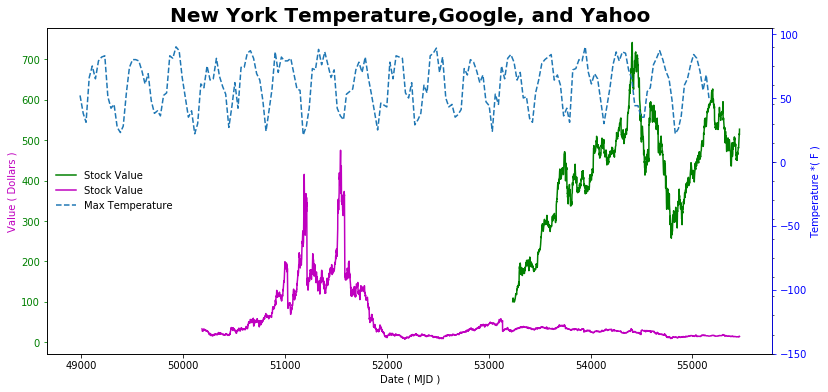

In [111]:
import numpy as np
fig,ax = plt.subplots(figsize=(13,6))

p1=ax.plot(google['Modified Julian Date'],google['Stock Value'],color='g') # Plotting Google stocks
p2=ax.plot(yahoo['Modified Julian Date'],yahoo['Stock Value'],color='m') # Plotting Yahoo stocks
ax.set_xlabel('Date ( MJD )') # Setting X label
ax.set_ylabel('Value ( Dollars )',color='m') # Setting Y label and color
ax.tick_params(axis='y',colors='green') # Setting color for xticks


ax2=ax.twinx() # Creating a second y axis 

p3=ax2.plot(ny['Modified Julian Date'],ny['Max Temperature'],linestyle='dashed') # Plotting TNY Temperature
ax2.set_yticks(np.arange(-150,120,15),minor=True) # Setting the yticks for temperature
ax2.set_ylabel("Temperature *( F )",color='blue') # Setting ylabel and color for temperature axis
ax2.spines['right'].set_color('blue')  # Setting color of axis for temperature
ax2.tick_params(axis='y', colors='blue') # Setting color of y ticks 
ax.set_title('New York Temperature,Google, and Yahoo',fontweight='bold',fontsize=20)


# Combing the legends
p4=p1+p2+p3 #
lgs = [l.get_label() for l in p4]
ax.legend(p4, lgs, loc=6,frameon=False)

plt.show()